<a href="https://colab.research.google.com/github/BumaranChe/Animal_Faces_Detection_Projects/blob/main/Option1_OpenCV_Haar_Cascade_Classifier(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Option 1: Custom Haar Cascades for Animal Faces:**

# 1.0 Install the necessary libraries and install openCV

In [ ]:
# Step 1: Install dependencies
!sudo apt-get install libopencv-dev
!pip install opencv-python opencv-contrib-python

import cv2
import numpy as np
import os
import shutil
from google.colab import files
from google.colab.patches import cv2_imshow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# 2.0 Upload 20 positve images (animal faces) and 20 negative images (background images)

In [ ]:
# Step 2: Upload positive (animal face) and negative (background) images
# Make folders for positive and negative samples
os.makedirs("data/positive", exist_ok=True)
os.makedirs("data/negative", exist_ok=True)

print("Upload POSITIVE images (animal faces)...")
uploaded = files.upload()
for fname in uploaded.keys():
    shutil.move(fname, "data/positive/" + fname)

print("Upload NEGATIVE images (no animal faces)...")
uploaded = files.upload()
for fname in uploaded.keys():
    shutil.move(fname, "data/negative/" + fname)

Upload POSITIVE images (animal faces)...


Saving pos1.jpg to pos1.jpg
Saving pos2.jpg to pos2.jpg
Saving pos3.jpg to pos3.jpg
Saving pos4.jpg to pos4.jpg
Saving pos5.jpg to pos5.jpg
Saving pos6.jpg to pos6.jpg
Saving pos7.jpg to pos7.jpg
Saving pos8.jpg to pos8.jpg
Saving pos9.jpg to pos9.jpg
Saving pos10.jpg to pos10.jpg
Saving pos11.jpg to pos11.jpg
Saving pos12.jpg to pos12.jpg
Saving pos13.jpg to pos13.jpg
Saving pos14.jpg to pos14.jpg
Saving pos15.jpg to pos15.jpg
Saving pos16.jpg to pos16.jpg
Saving pos17.jpg to pos17.jpg
Saving pos18.jpg to pos18.jpg
Saving pos19.jpg to pos19.jpg
Saving pos20.jpg to pos20.jpg
Upload NEGATIVE images (no animal faces)...


Saving neg1.jpg to neg1.jpg
Saving neg2.jpg to neg2.jpg
Saving neg3.jpg to neg3.jpg
Saving neg4.jpg to neg4.jpg
Saving neg5.jpg to neg5.jpg
Saving neg6.jpg to neg6.jpg
Saving neg7.jpg to neg7.jpg
Saving neg8.jpg to neg8.jpg
Saving neg9.jpg to neg9.jpg
Saving neg10.jpg to neg10.jpg
Saving neg11.jpg to neg11.jpg
Saving neg12.jpg to neg12.jpg
Saving neg13.jpg to neg13.jpg
Saving neg14.jpg to neg14.jpg
Saving neg15.jpg to neg15.jpg
Saving neg16.jpg to neg16.jpg
Saving neg17.jpg to neg17.jpg
Saving neg18.jpg to neg18.jpg
Saving neg19.jpg to neg19.jpg
Saving neg20.jpg to neg20.jpg


In [ ]:
!apt-get install libopencv-dev python3-opencv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy1).
Suggested packages:
  python-numpy-doc python3-pytest
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,274 kB of archives.
After this operation, 27.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-opencv amd64 4.5.4+dfsg-9ubuntu4+jammy1 [1,807 kB]
Fetched 5,274 kB in 4s (1,205 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.21.5-1ubuntu22.04.1_amd64.deb ...
Unpacking python3-numpy (1:1.21.5-

# 3.0 Install openCV 3.4.16 (older version) in order to use opencv_createsamples and opencv_traincascade

In [ ]:
# Get OpenCV 3.4.16
!git clone --branch 3.4.16 https://github.com/opencv/opencv.git
%cd opencv

# Create build dir
!mkdir build
%cd build

# Configure with apps enabled
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
    -D CMAKE_INSTALL_PREFIX=/usr/local \
    -D BUILD_opencv_apps=ON \
    ..

# Build
!make -j$(nproc)

# Copy to PATH
!sudo cp bin/opencv_traincascade /usr/local/bin/
!sudo cp bin/opencv_createsamples /usr/local/bin/

# Test
!opencv_traincascade --help
!opencv_createsamples --help

Cloning into 'opencv'...
remote: Enumerating objects: 346796, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 346796 (delta 91), reused 29 (delta 29), pack-reused 346606 (from 4)
Receiving objects: 100% (346796/346796), 535.55 MiB | 26.92 MiB/s, done.
Resolving deltas: 100% (241960/241960), done.
Note: switching to 'b1cf5501233405de3ea5926d1d688e421b337458'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Updating files: 100% (6419/6419), done.
/content/op

# 4.0 Create .vec file using my own positive.txt (with the information of x1,y1,w,h measurements on all the positive images). positive.txt is created based on my dataset Colab file which is (Image_Size(Dataset)_for_Deep_Learning_Yolov5_and_Haar_Cascade_Classfier(GitHub).ipynb)

In [ ]:

# Step 3: Create .vec file for positives
!opencv_createsamples -info /content/positives.txt -num 20 -w 24 -h 24 -vec /content/positives.vec

Info file name: /content/positives.txt
Img file name: (NULL)
Vec file name: /content/positives.vec
BG  file name: (NULL)
Num: 20
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 24
Height: 24
Max Scale: -1
RNG Seed: 12345
Create training samples from images collection...
Done. Created 20 samples


In [ ]:
!ls -1 /content/positives.txt

/content/positives.txt


# The positives.txt is placed in content directory

In [ ]:
# Check current working directory
!pwd

/content/opencv/build
data/positive/pos1.jpg 1 0 10 260 180
data/positive/pos2.jpg 1 100 130 90 35
data/positive/pos3.jpg 1 90 20 60 170
data/positive/pos4.jpg 1 40 8 170 252
data/positive/pos5.jpg 1 40 30 90 130
data/positive/pos6.jpg 1 10 20 170 100
data/positive/pos7.jpg 1 35 20 165 190
data/positive/pos8.jpg 1 80 40 200 230
data/positive/pos9.jpg 1 60 0 200 240
data/positive/pos10.jpg 1 100 30 160 230


# 5.0 Create cascade.xml and train the model based on positives.txt and negatives.txt. The image folder is located at content/data/positive/ and content/data/negative/

In [ ]:
# Remove the old classifier folder
!rm -rf /content/classifier

# Create a fresh empty one
!mkdir /content/classifier

!opencv_traincascade -data /content/classifier -vec /content/positives.vec -bg /content/negatives.txt -numPos 20 -numNeg 20 -numStages 10 -w 24 -h 24

PARAMETERS:
cascadeDirName: /content/classifier
vecFileName: /content/positives.vec
bgFileName: /content/negatives.txt
numPos: 20
numNeg: 20
numStages: 10
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: HAAR
sampleWidth: 24
sampleHeight: 24
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
mode: BASIC
Number of unique features given windowSize [24,24] : 162336

===== TRAINING 0-stage =====
<BEGIN
POS count : consumed   20 : 20
NEG count : acceptanceRatio    20 : 1
Precalculation time: 0
+----+---------+---------+
|  N |    HR   |    FA   |
+----+---------+---------+
|   1|        1|        1|
+----+---------+---------+
|   2|        1|      0.1|
+----+---------+---------+
END>
Training until now has taken 0 days 0 hours 0 minutes 0 seconds.

===== TRAINING 1-stage =====
<BEGIN
POS count : consumed   20 : 20
NEG count : acceptanceRatio    20 : 0.285714
Precalcu

In [ ]:
%cd /content/

/content


# 6.0 Test the trained cascade

In [ ]:
# Step 5: Test the trained cascade
# Load the trained cascade
from google.colab import files
animal_cascade = cv2.CascadeClassifier('classifier/cascade.xml')

# Upload a test image
#uploaded = files.upload()
#for filename in uploaded.keys():
#    print(f'User uploaded file "{filename}"')
test_img_path = "/content/data/positive"

img = cv2.imread('/content/data/positive/pos8.jpg')
#img = cv2.imread('/content/data/testing/test1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

animals = animal_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in animals:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imwrite("detected.jpg", img)
files.download("detected.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

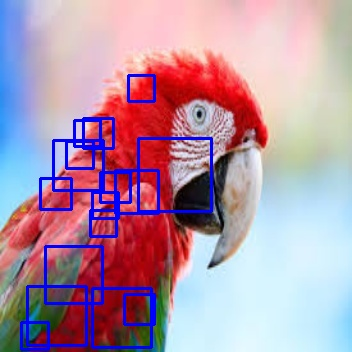

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img=cv2.imread('detected.jpg')
cv2_imshow(img)

Based on the testing after train the model, it able to detect pos8.jpg as animal. It unable to detect the fake frog image (pos2.jpg). It also unable to detect some of the animal faces. Based on the bounding box on detected images, it shows that this model not only focusing on the animal face image but it's checking the entire image for animal detection as well as including the face checking. This model didn't detect any negative images as positive image (detected image). Since i only used 20 positive images, the model is not so consistent like pre-trained model (which was trained with huge datasets).

In [ ]:
!cp /usr/local/bin/opencv_traincascade /content/drive/MyDrive/
!cp /usr/local/bin/opencv_createsamples /content/drive/MyDrive/

cp: cannot create regular file '/content/drive/MyDrive/': No such file or directory
cp: cannot create regular file '/content/drive/MyDrive/': No such file or directory


In [ ]:
#!cp /content/drive/MyDrive/opencv_traincascade /usr/local/bin/
#!cp /content/drive/MyDrive/opencv_createsamples /usr/local/bin/
!chmod +x /usr/local/bin/opencv_traincascade
!chmod +x /usr/local/bin/opencv_createsamples